In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data set

In [362]:
original = pd.read_csv('college_student_placement_dataset.csv', encoding='ISO-8859-1')

original.info() #The info is consistent with the kaggle website

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


Preview the data set

In [363]:
original.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [364]:
original.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


Binary encode and or bucket the features

In [365]:
original = original.replace({'Yes': 1, 'No': 0})
original.head()

C:\Users\BrandonChen\AppData\Local\Temp\ipykernel_13344\3731699218.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  original = original.replace({'Yes': 1, 'No': 0})


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


Remove "College_ID" feature.

Although may have relation to placement, this feature will add too much noise or cause the model to overfit an imaginary numeric structure.

In [366]:
original_core = original.drop(columns=["College_ID"])
original_core.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,0
1,97,5.52,5.37,8,0,7,8,0,0
2,109,5.36,5.83,9,0,3,1,1,0
3,122,5.47,5.75,6,1,1,6,1,0
4,96,7.91,7.69,7,0,8,10,2,0


Remove "IQ" feature.

Project choice; it is unrealistic for schools to obtain this information.

In [367]:
original_core = original_core.drop(columns=["IQ"])
original_core.head()

,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,6.61,6.28,8,0,8,8,4,0
1,5.52,5.37,8,0,7,8,0,0
2,5.36,5.83,9,0,3,1,1,0
3,5.47,5.75,6,1,1,6,1,0
4,7.91,7.69,7,0,8,10,2,0


Check for missing values

In [368]:
original_core.isnull().sum()

Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

Visualize the data

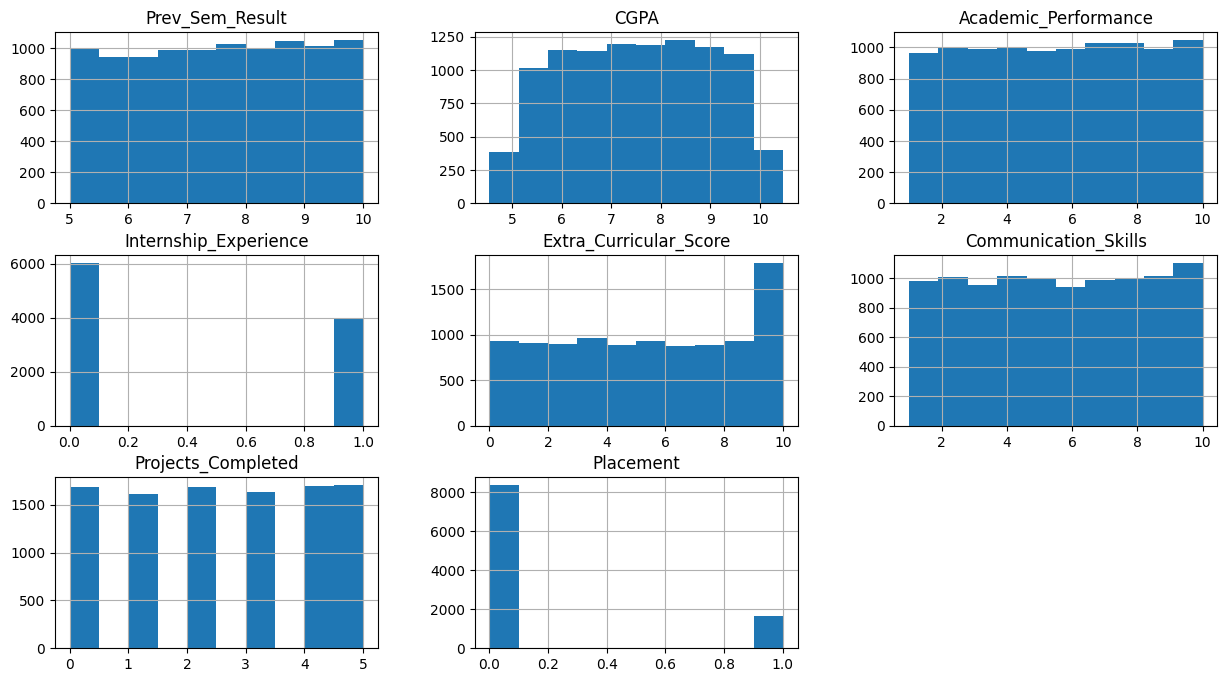

In [369]:
original_core.hist(figsize=(15, 8));

Correlation heatmap shows the relationship between features and features, and features and labels.

Higher absolute correlation value shows the 2 features provide the same information, this means 1 feature is just a linear transformation of the other, removing 1 will reduce redunancy and dimenionality.

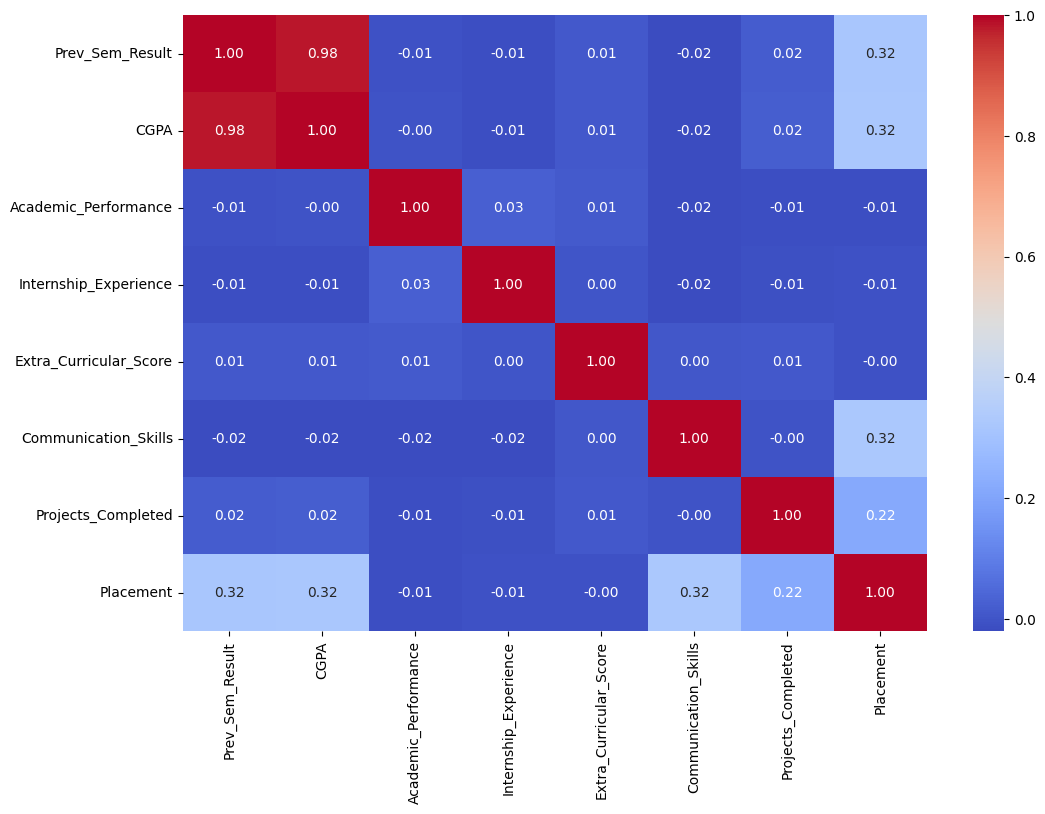

In [370]:
plt.figure(figsize=(12, 8))
sns.heatmap(original_core.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [371]:
original_core.corr()['Placement'].sort_values(ascending=False)

Placement                 1.000000
Communication_Skills      0.323155
CGPA                      0.321607
Prev_Sem_Result           0.317896
Projects_Completed        0.217499
Extra_Curricular_Score   -0.004740
Internship_Experience    -0.005841
Academic_Performance     -0.014920
Name: Placement, dtype: float64

"Prev_Sem_Result" feature is redundant.

The correlation to cgpa, it is almost a linear transformation of cgpa. Drop Prev_Sem_Result.

Remove CGPA instead because cleaned dataset was working poorly, test Prev_Sem_Result instead. Likely recent semesters are more important for placement.

In [372]:
# cleaned = original_core.drop(columns=["Prev_Sem_Result"])
cleaned = original_core.drop(columns=["CGPA"])
cleaned.head()

,Prev_Sem_Result,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,6.61,8,0,8,8,4,0
1,5.52,8,0,7,8,0,0
2,5.36,9,0,3,1,1,0
3,5.47,6,1,1,6,1,0
4,7.91,7,0,8,10,2,0


Before export, check for duplicate rows.

In [373]:
print(cleaned.duplicated().sum())
print(original_core.duplicated().sum())

9
0


Drop the dupes.

In [374]:
cleaned = cleaned.drop_duplicates()
print(cleaned.duplicated().sum())
print(original_core.duplicated().sum())

0
0


Export for model.

In [375]:
cleaned.to_csv("cleaned.csv", index=False)

In [376]:
original_core.to_csv("original.csv", index=False)

In [377]:
print(original_core.duplicated().sum())

0
